## Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [108]:
#Scaleres
from sklearn.preprocessing import RobustScaler

#train
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#Imputer
from sklearn.impute import SimpleImputer

#PipeLine
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

#Model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

#Grid Search
from sklearn.model_selection import GridSearchCV

#Regularizers
from sklearn.linear_model import Lasso, Ridge

In [14]:
data = pd.read_pickle("/home/ecapi/code/sebvey/water_pollution/cooked_data/2011_2021_pc_saone_df.pickle")

# Preproc

In [32]:
df = data.dropna()

In [36]:
df.shape

(2042, 17)

In [62]:
PARAM_LABELS = {
    1303: "Conductivité à 25°C",
    1311: "Oxygène dissous",
    1301: "Température de l'Eau",
    1302: "Potentiel en Hydrogène (pH)",
    1312: "Taux de saturation en oxygène",
    1841: "Carbone Organique",
    1295: "Turbidité Formazine Néphélométrique",
    1335: "Ammonium",
    1314: "Demande Chimique en Oxygène (DCO)",
    1433: "Orthophosphates (PO4)",
    1313: "Demande Biochimique en oxygène en 5 jours (D.B.O.5)",
    1350: "Phosphore total",
    1319: "Azote Kjeldahl",
    1340: "Nitrates",
    1339: "Nitrites",
    1305: "Matières en suspension",
    1342: "Silicates",
}

In [68]:
PARAM_LABELS.get(1303)

'Conductivité à 25°C'

In [72]:
df_n =df

In [80]:
for ind in df_n.columns:
    nw_ind = PARAM_LABELS.get(int(ind))
    df_n.rename(columns={ind: nw_ind}, inplace=True)
    

/home/ecapi/.pyenv/versions/3.8.12/envs/water_pollution/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [99]:
df_n

,Turbidité Formazine Néphélométrique,Température de l'Eau,Potentiel en Hydrogène (pH),Conductivité à 25°C,Matières en suspension,Oxygène dissous,Taux de saturation en oxygène,Demande Biochimique en oxygène en 5 jours (D.B.O.5),Demande Chimique en Oxygène (DCO),Azote Kjeldahl,Phosphore total,Ammonium,Nitrites,Nitrates,Orthophosphates (PO4),Carbone Organique,Silicates
0,2.40,6.6,8.20,70.0,2.0,10.7,90.0,0.9,6.5,1.00,0.040,0.05,0.02,4.5,0.09,1.4,8.908333
1,7.90,2.0,7.10,54.0,2.6,14.1,104.0,1.1,5.1,1.00,0.020,0.05,0.02,4.3,0.05,2.3,8.908333
2,17.00,6.7,8.40,58.0,11.0,13.1,108.0,2.8,9.7,1.10,0.030,0.08,0.02,3.4,0.02,2.6,8.908333
3,17.00,7.5,5.29,57.0,11.0,11.7,100.0,2.8,9.7,1.10,0.030,0.08,0.02,3.4,0.02,2.6,8.908333
4,13.00,12.1,7.70,60.0,6.8,9.0,85.0,0.7,7.8,1.00,0.030,0.05,0.02,2.7,0.03,3.5,8.908333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,1.17,11.3,8.20,538.0,2.5,11.0,102.0,3.0,20.0,0.50,0.024,0.04,0.03,10.0,0.04,2.0,0.800000
2039,7.70,15.2,8.00,422.0,7.9,9.6,96.0,2.0,20.0,0.50,0.055,0.06,0.06,9.0,0.13,3.3,5.500000
2040,7.00,22.9,7.90,501.0,6.4,7.7,91.0,4.0,20.0,0.50,0.083,0.10,0.07,7.8,0.19,2.6,5.300000
2041,5.50,21.8,7.80,487.0,3.9,6.6,75.0,1.4,20.0,0.52,0.081,0.06,0.06,7.4,0.17,3.7,7.600000


## Features and Data selection

In [100]:
X = df_n.drop(columns="Nitrates") #drop the target
y = df_n["Nitrates"] # Series of the target

## Train, test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Linear Regresion

## Linear PipeLine

In [84]:
numerical_transformer = Pipeline([
    ("numerical_impute", SimpleImputer(strategy='mean')),
    ("scaler", RobustScaler()) #take out the outliers 
    ])

preprocessor = ColumnTransformer([
    ("num_transformer", numerical_transformer)
])

pipe_linear = Pipeline([
    ("num-transformer", numerical_transformer),
    ("model", LinearRegression())
])

#Initiate the model
baseline_linear_pipe = pipe_linear

## model test function

In [112]:
def model_testing(pipe_line, X, y, cv=5, scoring="r2"):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    test_model = pipe_line
    test_model.fit(X_train, y_train)
    test_score = test_model.score(X_test, y_test)
    
    cross_val_results = cross_val_score(test_model, X, y, cv=cv, scoring=scoring )
    
    
    
    return print(f"Results: \nCross Val Score: {cross_val_results} \nScore Baseline: {cross_val_results.mean()} \nModel Score: {test_score}\nScoring={scoring} & CV={cv}")
    

In [113]:
model_testing(baseline_linear_pipe,X,y,)

Results: 
Cross Val Score: [-1.69181113  0.23512886  0.50093809 -0.54527108  0.52917368] 
Score Baseline: -0.1943683146188782 
Model Score: 0.47379137506040214
Scoring=r2 & CV=5


In [114]:
# Scoring RMSE for prediction with the same target value
model_testing(baseline_linear_pipe,X,y,scoring="neg_root_mean_squared_error")

Results: 
Cross Val Score: [-5.61489502 -3.74795631 -3.19577639 -4.91609132 -2.72951879] 
Score Baseline: -4.040847565124259 
Model Score: 0.1270628852248733
Scoring=neg_root_mean_squared_error & CV=5


In [97]:
cv_results = cross_validate(baseline_linear_pipe, X, y, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results)

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.012996,0.002864,-11.595294,-1.691811,-4.910928,-31.527046
1,0.010098,0.002771,-22.408645,0.235129,-2.855878,-14.047176
2,0.011876,0.002982,-9.168001,0.500938,-2.550049,-10.212987
3,0.010508,0.005517,-83.059910,-0.545271,-2.130256,-24.167954
4,0.016342,0.003502,-8.179351,0.529174,-2.082871,-7.450273


<AxesSubplot:>

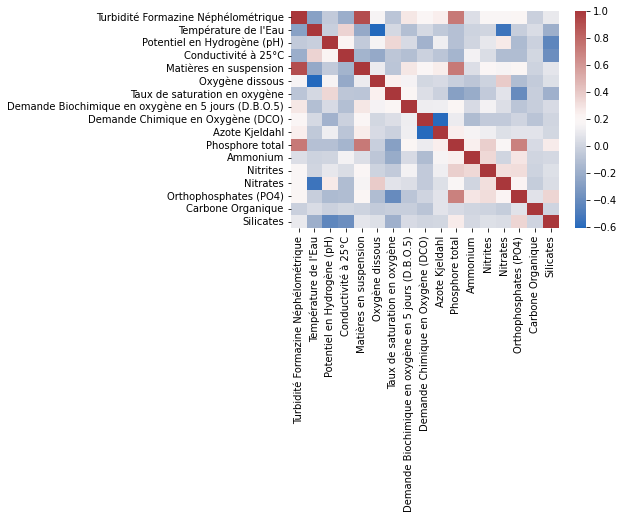

In [102]:
corr_df = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "vlag")

In [104]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation']
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
4,Turbidité Formazine Néphélométrique,Matières en suspension,0.908336
68,Matières en suspension,Turbidité Formazine Néphélométrique,0.908336
78,Matières en suspension,Phosphore total,0.729299
174,Phosphore total,Matières en suspension,0.729299
10,Turbidité Formazine Néphélométrique,Phosphore total,0.726086


In [105]:
corr_df[corr_df["feature_1"]=="Nitrates"]

,feature_1,feature_2,correlation
226,Nitrates,Oxygène dissous,0.386952
233,Nitrates,Nitrites,0.311227
223,Nitrates,Potentiel en Hydrogène (pH),0.268870
235,Nitrates,Orthophosphates (PO4),0.216263
231,Nitrates,Phosphore total,0.179512
221,Nitrates,Turbidité Formazine Néphélométrique,0.177695
225,Nitrates,Matières en suspension,0.155073
227,Nitrates,Taux de saturation en oxygène,0.075295
230,Nitrates,Azote Kjeldahl,0.055949
228,Nitrates,Demande Biochimique en oxygène en 5 jours (D.B...,0.046085


### taking out no correlated features to the target

In [118]:
X_reduc = X.drop(columns=["Conductivité à 25°C","Demande Chimique en Oxygène (DCO)", "Carbone Organique", "Ammonium","Silicates","Demande Biochimique en oxygène en 5 jours (D.B.O.5)","Azote Kjeldahl", "Taux de saturation en oxygène", "Matières en suspension", "Turbidité Formazine Néphélométrique", "Phosphore total", "Orthophosphates (PO4)" ])

In [121]:
X_reduc

,Température de l'Eau,Potentiel en Hydrogène (pH),Oxygène dissous,Nitrites
0,6.6,8.20,10.7,0.02
1,2.0,7.10,14.1,0.02
2,6.7,8.40,13.1,0.02
3,7.5,5.29,11.7,0.02
4,12.1,7.70,9.0,0.02
...,...,...,...,...
2038,11.3,8.20,11.0,0.03
2039,15.2,8.00,9.6,0.06
2040,22.9,7.90,7.7,0.07
2041,21.8,7.80,6.6,0.06


can't use an AdaBooster nor a forestregressor or a decision tree

# Lasso

In [110]:
numerical_transformer = Pipeline([
    ("numerical_impute", SimpleImputer(strategy='mean')),
    ("scaler", RobustScaler()) #take out the outliers 
    ])

preprocessor = ColumnTransformer([
    ("num_transformer", numerical_transformer)
])

pipe_lasso = Pipeline([
    ("num-transformer", numerical_transformer),
    ("model", Lasso(alpha=1.0))
])

#Initiate the model
baseline_lasso_pipe = pipe_lasso

In [115]:
model_testing(pipe_lasso,X,y)

Results: 
Cross Val Score: [-0.79345514 -0.10007575  0.05855362  0.16278424  0.13713805] 
Score Baseline: -0.10701099524340474 
Model Score: 0.15976478044034637
Scoring=r2 & CV=5


# Gradient Boosting Model

## Gradient Boosting pipe

In [90]:
numerical_transformer_grad = Pipeline([
    ("numerical_impute", SimpleImputer(strategy='mean')),
    ("scaler", RobustScaler()) #take out the outliers 
    ])

preprocessor_grad = ColumnTransformer([
    ("num_transformer", numerical_transformer_grad)
])

pipe_gradient = Pipeline([
    ("num-transformer", numerical_transformer_grad),
    ("model", GradientBoostingRegressor())
])

#Initiate the model
baseline_gradient_pipe = pipe_gradient

## model test function

In [91]:
model_testing(baseline_gradient_pipe,X,y)

Results: 
Cross Val Score: [-5.05917378  0.38979586  0.64832723  0.65787817  0.59558123] 
Score Baseline: -0.5535182590678297 
Model Score: 0.6659872641632951
Scoring=r2 & CV=5


In [92]:
model_testing(baseline_gradient_pipe,X,y,scoring="neg_root_mean_squared_error")

Results: 
Cross Val Score: [-8.40578509 -3.34843467 -2.68170149 -2.31447337 -2.53093576] 
Score Baseline: -3.8562660748928552 
Model Score: 0.7038193505884371
Scoring=neg_root_mean_squared_error & CV=5


# KNN

In [86]:
numerical_transformer_KNN = Pipeline([
    ("numerical_impute", SimpleImputer(strategy='mean')),
    ("scaler", RobustScaler()) #take out the outliers 
    ])

preprocessor_KNN = ColumnTransformer([
    ("num_transformer", numerical_transformer_KNN)
])

pipe_KNN = Pipeline([
    ("num-transformer", numerical_transformer_KNN),
    ("model", KNeighborsRegressor())
])

#Initiate the model
baseline_KNN_pipe = pipe_KNN

In [88]:
model_testing(baseline_KNN_pipe,X,y)

Results: 
Cross Val Score: [-0.70076038  0.22945237  0.24103641  0.62561658  0.32164065] 
Score Baseline: 0.14339712667068388 
Model Score: 0.5646174355688313
Scoring=r2 & CV=5


In [89]:
model_testing(baseline_KNN_pipe,X,y, scoring="neg_root_mean_squared_error")

Results: 
Cross Val Score: [-2.48056935 -2.36422034 -3.12553563 -2.8188305  -3.06276972] 
Score Baseline: -2.7703851096791245 
Model Score: 0.6215453917366439
Scoring=neg_root_mean_squared_error & CV=5


# SVR

In [93]:
numerical_transformer_svr = Pipeline([
    ("numerical_impute", SimpleImputer(strategy='mean')),
    ("scaler", RobustScaler()) #take out the outliers 
    ])

preprocessor_svr = ColumnTransformer([
    ("num_transformer", numerical_transformer_svr)
])

pipe_svr = Pipeline([
    ("num-transformer", numerical_transformer_svr),
    ("model", SVR())
])

#Initiate the model
baseline_svr_pipe = pipe_svr

In [94]:
model_testing(baseline_svr_pipe, X,y)

Results: 
Cross Val Score: [-0.21767033 -0.20983572 -0.07914441 -0.09657258 -0.10180656] 
Score Baseline: -0.141005918878336 
Model Score: 0.005408605540370481
Scoring=r2 & CV=5


In [95]:
model_testing(baseline_svr_pipe,X,y,scoring="neg_root_mean_squared_error")

Results: 
Cross Val Score: [-2.09891413 -2.96245259 -3.72695171 -4.82424494 -3.90334655] 
Score Baseline: -3.503181984374547 
Model Score: -0.0664076470698094
Scoring=neg_root_mean_squared_error & CV=5
